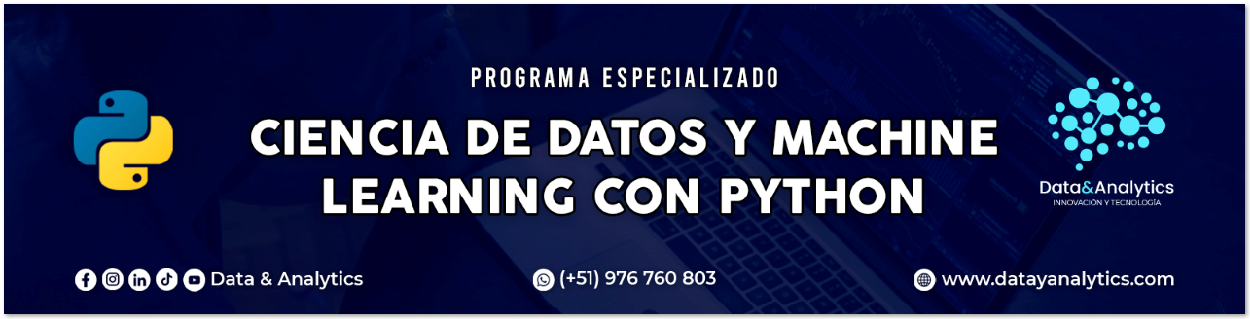

#DATA & ANALYTICS



----------------------------
SESIÓN N°: Análisis de Componentes Principales (ACP)

Instructor: 

E-mail: cursos@datayanalytics.com

Web: www.datayanalytics.com

<h2 style="color:#000000;font-size:45px;font-family:Georgia;text-align:center;">🍷<strong style="color:black;font-size:40px;font-family:serif;">CASO: PREDICCIÓN DE LA CALIDAD DEL VINO TINTO </strong>🍷</h2>

<p style="border-style:outset;font-family:Georgia;color:#03051a;font-size:110%;text-align:left;">En este cuaderno, vamos a realizar <b>Análisis de características</b>. A continuación, reduciremos las dimensiones utilizando una de las técnicas de reducción de dimensionalidad llamado PCA. Por otro lado, vamos a crear un modelo que nos ayudará a predecir la <b>"Calidad del vino tinto"</b>. Como la variable objetivo son valores discretos, entonces vamos a <b>crear un modelo de clasificación</b>. Sabemos que cada variable afectará la calidad del vino tinto y esto ayudará a los productores, distribuidores y empresas de la industria del vino tinto a evaluar mejor su estrategia de producción, distribución y precios.</p>

<h2 style="color:#000000;font-size:45px;font-family:Georgia;text-align:center;">🍷<strong style="color:black;font-size:40px;font-family:serif;">ENTENDIMIENTO DEL PROBLEMA</strong>🍷</h2>

<p style="border-style:outset;font-family:Georgia;color:#03051a;font-size:110%;text-align:left;">La industria del vino tinto muestra un crecimiento exponencial reciente a medida que aumenta el consumo social. Hoy en día, los actores de la industria están utilizando certificaciones de calidad de productos para promocionar sus productos. Este es un proceso que requiere mucho tiempo y requiere la evaluación de expertos humanos, lo que hace proceso muy costoso. Además, el precio del vino tinto depende de un concepto bastante abstracto de la apreciación del vino por parte de los catadores, cuya opinión puede tener un alto grado de variabilidad.<br>Otro factor vital en la certificación del vino tinto y la evaluación de la calidad es la fisicoquímica. pruebas, que son de laboratorio y consideran factores como <b>acidez, nivel de pH, azúcar y otras propiedades químicas</b>. El mercado del vino tinto sería de interés si la calidad humana de la degustación se puede relacionar con la química del vino. propiedades para que los procesos de certificación y evaluación y aseguramiento de la calidad estén más controlados.</p>

<h2 style="color:#000000;font-size:45px;font-family:Georgia;text-align:center;">🍷<strong style="color:black;font-size:40px;font-family:serif;">ENTENDIMIENTO DE LOS DATOS</strong>🍷</h2>


<a id="1"></a>
<h2 style="border-style: outset;color:black;font-size:25px;font-family:Georgia;text-align:left;"><b>1.Importando Libreria</b></h2>

In [ ]:
# Manipulación y Tratamiento de Datos
import numpy as np 
import pandas as pd 

# Visualización de los Datos
from matplotlib import pyplot as plt 
%matplotlib inline
plt.style.use('ggplot')

import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

#from IPython.core.interactiveshell import InteractiveShell 
#InteractiveShell.ast_node_interactivity = "all"

# Librerias para  machine learning 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,ExtraTreesClassifier,GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve ,KFold
from sklearn.metrics import roc_curve,accuracy_score,f1_score,auc,confusion_matrix,roc_auc_score
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<a id="2"></a>
<h2 style="border-style: outset;color:black;font-size:25px;font-family:Georgia;text-align:left;"><b>2.Cargando Datos</b></h2>

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Data/wineQualityReds.csv")
df.head()

,Unnamed: 0,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,5,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
df = df.drop('Unnamed: 0', axis=1)

In [ ]:
df.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


<a id="3"></a>
<h2 style="border-style: outset;color:black;font-size:25px;font-family:Georgia;text-align:left;"><b>3.Meta información del conjunto de datos</b></h2>

In [ ]:
# Tamaño de los Datos
df.shape

(1599, 12)

In [ ]:
# La información del conjunto de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed.acidity         1599 non-null   float64
 1   volatile.acidity      1599 non-null   float64
 2   citric.acid           1599 non-null   float64
 3   residual.sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free.sulfur.dioxide   1599 non-null   float64
 6   total.sulfur.dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


<a id=""></a>
<h2 style="border-style: outset;color:black;font-size:25px;font-family:Georgia;text-align:left;"><b>4.Buscndo valores únicos</b></h2>

In [ ]:
from IPython.core.display import HTML
def multi_table(table_list):
    ''' Acceps a list of IpyTable objects and returns a table which contains each IpyTable in a cell
    '''
    return HTML(
        '<table><tr style="background-color:white;">' + 
        ''.join(['<td>' + table._repr_html_() + '</td>' for table in table_list]) +
        '</tr></table>')

In [ ]:
df_nunique = {var: pd.DataFrame(df[var].value_counts()) 
              for var in {'quality'}}
multi_table([df_nunique['quality'].style.background_gradient(cmap='cool')])

,quality
5,681
6,638
7,199
4,53
8,18
3,10


<a id="5"></a>
<h2 style="border-style: outset;color:black;font-size:25px;font-family:Georgia;text-align:left;"><b>5.Encontrando los Missing Values</b></h2>

In [ ]:
df.isna().sum()

fixed.acidity           0
volatile.acidity        0
citric.acid             0
residual.sugar          0
chlorides               0
free.sulfur.dioxide     0
total.sulfur.dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

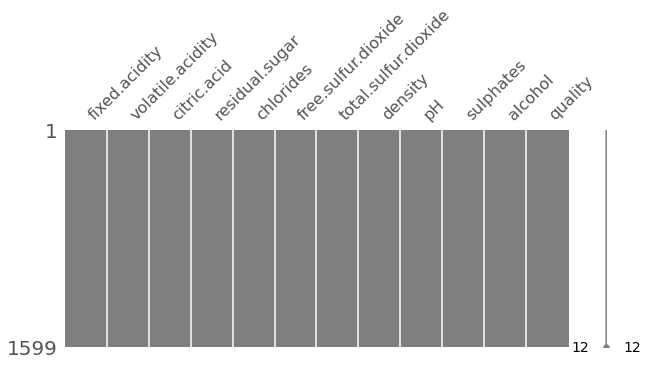

In [ ]:
# Visualización de los valores perdidos
import missingno as mn
mn.matrix(df,color=(0.5,0.5,0.5),figsize = (10,4));

<a id="6"></a>
<h2 style="border-style: outset;color:black;font-size:25px;font-family:Georgia;text-align:left;"><b>6.Encontrar los valores duplicados y Eliminarlo </b></h2>

In [ ]:
# Encontrando los duplicados del conjunto de datos...
df.duplicated().sum()

240

In [ ]:
# Eliminar todos los registros duplicados
df.drop_duplicates(inplace=True)

<a id="7"></a>
<h2 style="border-style: outset;color:black;font-size:25px;font-family:Georgia;text-align:left;"><b>7.Estadística Básica</b></h2>

In [ ]:
# Estadísticas sobre datos numéricos......
round(df.describe(exclude = 'object'), 2).T.style.background_gradient(cmap='cool')

,count,mean,std,min,25%,50%,75%,max
fixed.acidity,1359.000000,8.310000,1.740000,4.600000,7.100000,7.900000,9.200000,15.900000
volatile.acidity,1359.000000,0.530000,0.180000,0.120000,0.390000,0.520000,0.640000,1.580000
citric.acid,1359.000000,0.270000,0.200000,0.000000,0.090000,0.260000,0.430000,1.000000
residual.sugar,1359.000000,2.520000,1.350000,0.900000,1.900000,2.200000,2.600000,15.500000
chlorides,1359.000000,0.090000,0.050000,0.010000,0.070000,0.080000,0.090000,0.610000
free.sulfur.dioxide,1359.000000,15.890000,10.450000,1.000000,7.000000,14.000000,21.000000,72.000000
total.sulfur.dioxide,1359.000000,46.830000,33.410000,6.000000,22.000000,38.000000,63.000000,289.000000
density,1359.000000,1.000000,0.000000,0.990000,1.000000,1.000000,1.000000,1.000000
pH,1359.000000,3.310000,0.160000,2.740000,3.210000,3.310000,3.400000,4.010000
sulphates,1359.000000,0.660000,0.170000,0.330000,0.550000,0.620000,0.730000,2.000000


In [ ]:
# Guardamos una copia de los datos
df1=df.copy()

<a id="8"></a>
<h2 style="border-style: outset;color:black;font-size:25px;font-family:Georgia;text-align:left;"><b>8.Análisis de características y también búsqueda de valores atípicos</b></h2>

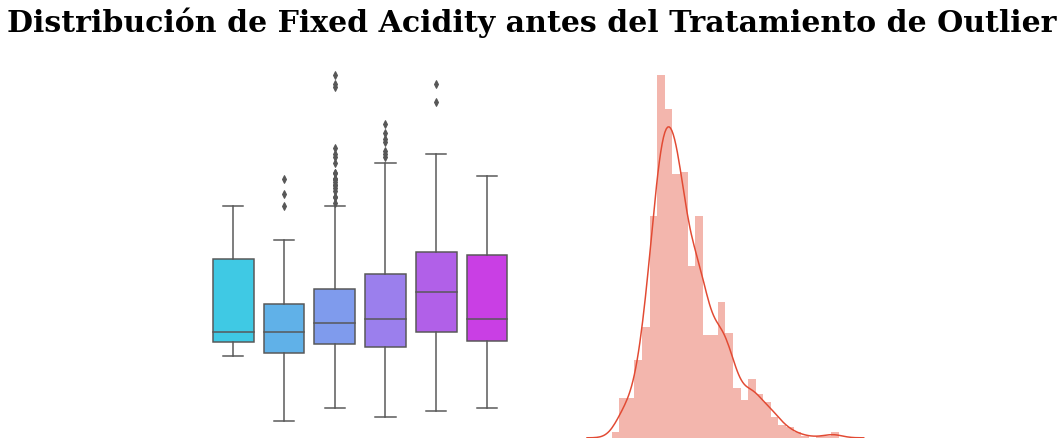

In [ ]:

plt.rcParams['font.family'] = ['serif']
#background_color = "#ffffff"

fig = plt.figure(figsize=(12,7), )
fig.suptitle('Distribución de Fixed Acidity antes del Tratamiento de Outlier', fontsize=30, fontweight='bold')


ax1 = fig.add_subplot(121)
ax1 = sns.boxplot(x=df1["quality"], y=df1["fixed.acidity"],palette="cool")
plt.axis('off')

ax2 = fig.add_subplot(122)
x=df1["fixed.acidity"]
ax2 = sns.distplot(x)

plt.axis('off')
plt.show();

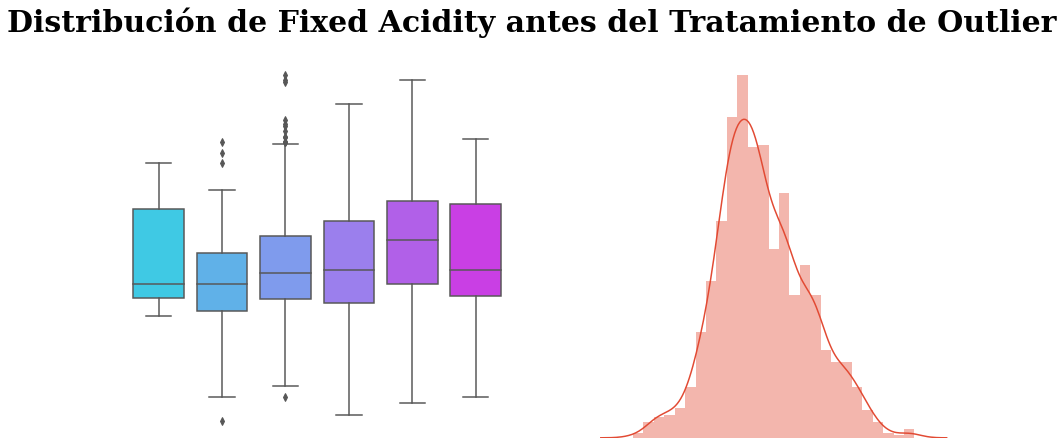

In [ ]:
df1["Log_fixed acidity"]=np.log(df1["fixed.acidity"])

plt.rcParams['font.family'] = ['serif']
background_color = "#ffffff"
fig = plt.figure(figsize=(15,7), facecolor=background_color)
fig.suptitle('Distribución de Fixed Acidity antes del Tratamiento de Outlier', fontsize=30, fontweight='bold')


ax1 = fig.add_subplot(121)
ax1 = sns.boxplot(x=df1["quality"], y=df1["Log_fixed acidity"],palette="cool")
plt.axis('off')

ax2 = fig.add_subplot(122)
x=df1["Log_fixed acidity"]
ax2 = sns.distplot(x)
plt.axis('off')
plt.show();

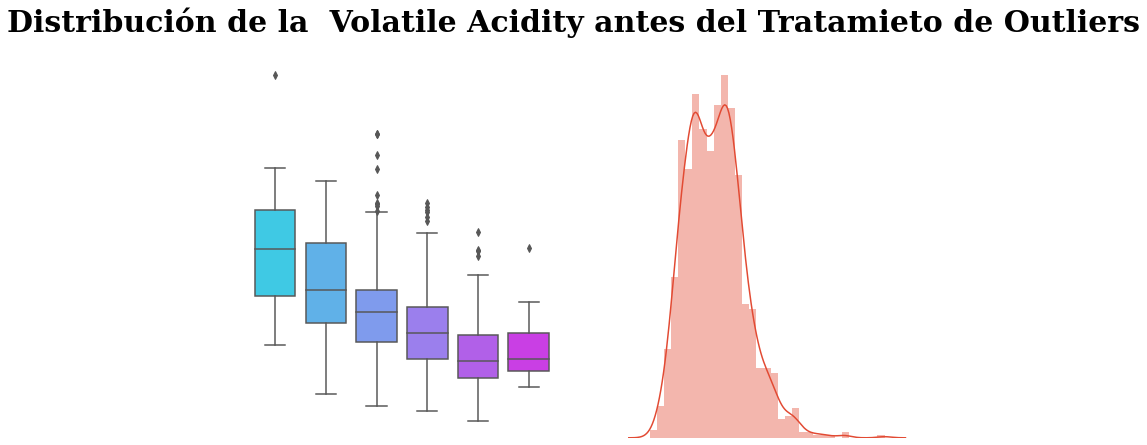

In [ ]:
plt.rcParams['font.family'] = ['serif']
background_color = "#ffffff"
fig = plt.figure(figsize=(12,7), facecolor=background_color)
fig.suptitle('Distribución de la  Volatile Acidity antes del Tratamieto de Outliers', fontsize=30, fontweight='bold')


ax1 = fig.add_subplot(121)
ax1 = sns.boxplot(x=df1["quality"], y=df1["volatile.acidity"],palette="cool")
plt.axis('off')

ax2 = fig.add_subplot(122)
x=df["volatile.acidity"]
ax2 = sns.distplot(x)
plt.axis('off')
plt.show();

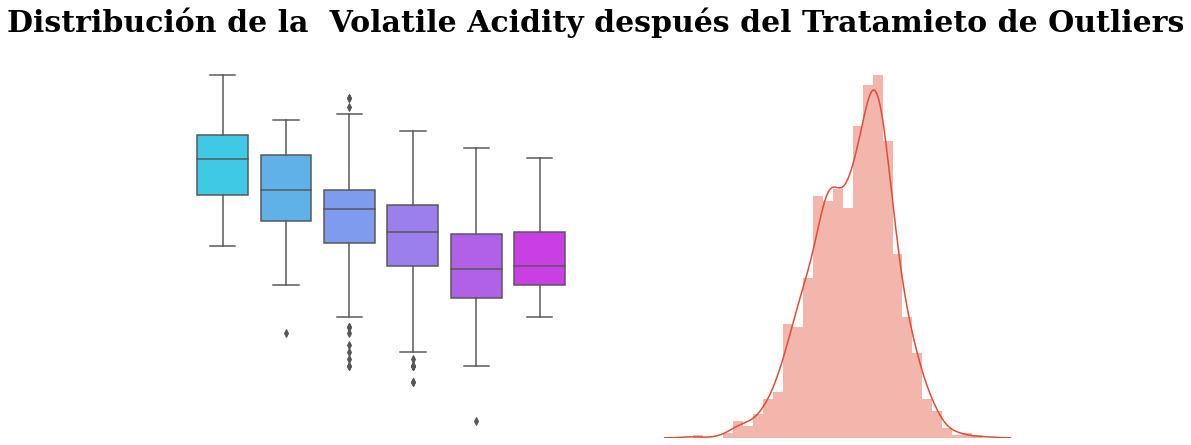

In [ ]:
df1["Log_volatile acidity"]=np.log(df1["volatile.acidity"])

plt.rcParams['font.family'] = ['serif']
background_color = "#ffffff"
fig = plt.figure(figsize=(15,7), facecolor=background_color)
fig.suptitle('Distribución de la  Volatile Acidity después del Tratamieto de Outliers', fontsize=30, fontweight='bold')

ax1 = fig.add_subplot(121)
ax1 = sns.boxplot(x=df1["quality"], y=df1["Log_volatile acidity"],palette="cool")
plt.axis('off')

ax2 = fig.add_subplot(122)
x=df1["Log_volatile acidity"]
ax2 = sns.distplot(x)
plt.axis('off')
plt.show();

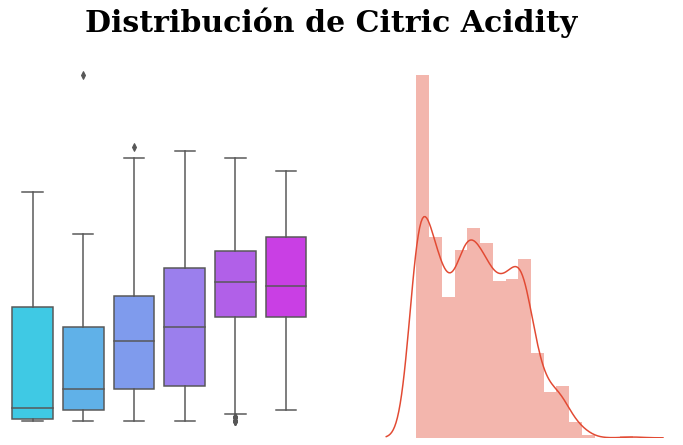

In [ ]:
plt.rcParams['font.family'] = ['serif']
background_color = "#ffffff"
fig = plt.figure(figsize=(12,7), facecolor=background_color)
fig.suptitle('Distribución de Citric Acidity', fontsize=30, fontweight='bold')

ax1 = fig.add_subplot(121)
ax1 = sns.boxplot(x=df1["quality"], y=df1["citric.acid"],palette="cool")
plt.axis('off')

ax2 = fig.add_subplot(122)
x=df1["citric.acid"]
ax2 = sns.distplot(x)
plt.axis('off')
plt.show();

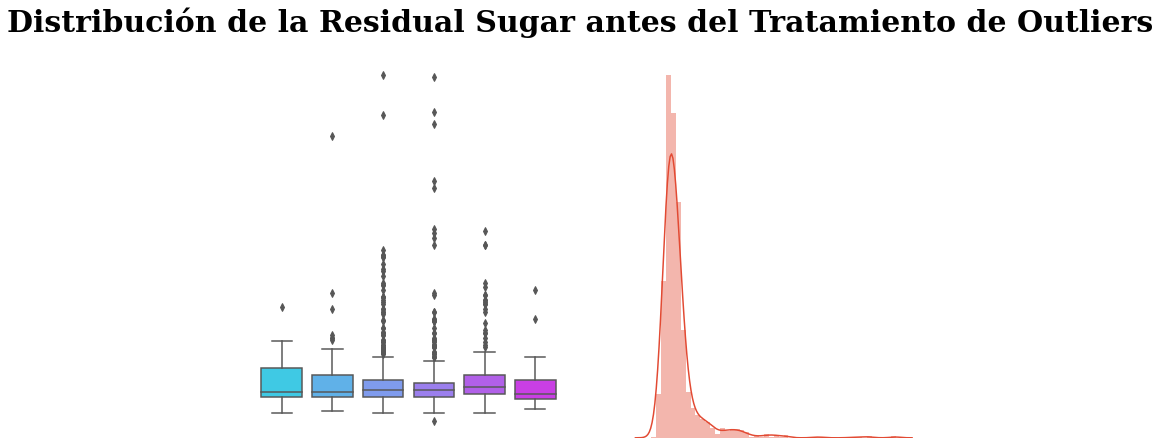

In [ ]:
plt.rcParams['font.family'] = ['serif']
background_color = "#ffffff"
fig = plt.figure(figsize=(12,7), facecolor=background_color)
fig.suptitle('Distribución de la Residual Sugar antes del Tratamiento de Outliers', fontsize=30, fontweight='bold')

 
ax1 = fig.add_subplot(121)
ax1 = sns.boxplot(x=df1["quality"], y=df1["residual.sugar"],palette="cool")
plt.axis('off')

ax2 = fig.add_subplot(122)
x=df1["residual.sugar"]
ax2 = sns.distplot(x)
plt.axis('off')
plt.show();

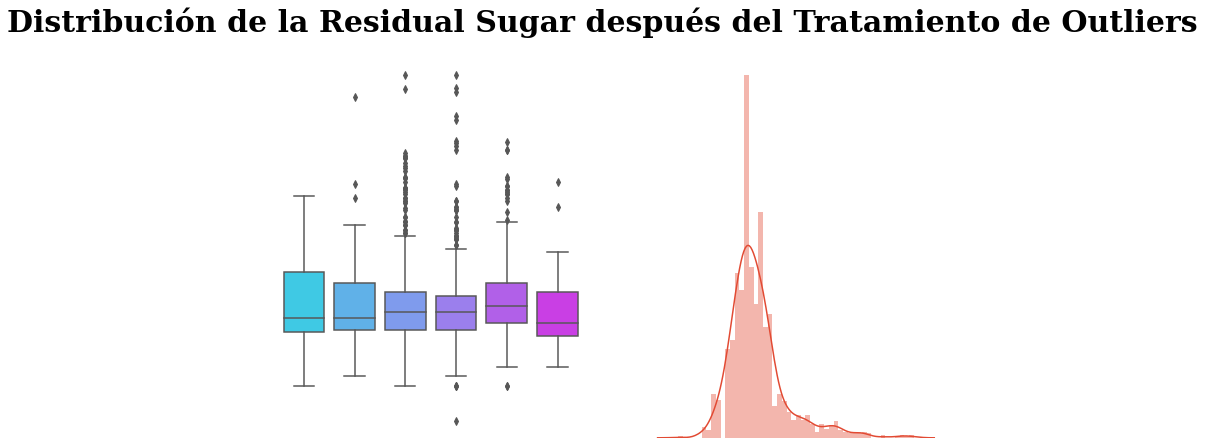

In [ ]:
df1["Log_residual sugar"]=np.log(df1["residual.sugar"])

plt.rcParams['font.family'] = ['serif']
background_color = "#ffffff"
fig = plt.figure(figsize=(12,7), facecolor=background_color)
fig.suptitle('Distribución de la Residual Sugar después del Tratamiento de Outliers', fontsize=30, fontweight='bold')

ax1 = fig.add_subplot(121)
ax1 = sns.boxplot(x=df1["quality"], y=df1["Log_residual sugar"],palette="cool")
plt.axis('off')

ax2 = fig.add_subplot(122)
x=df1["Log_residual sugar"]
ax2 = sns.distplot(x)
plt.axis('off')
plt.show();

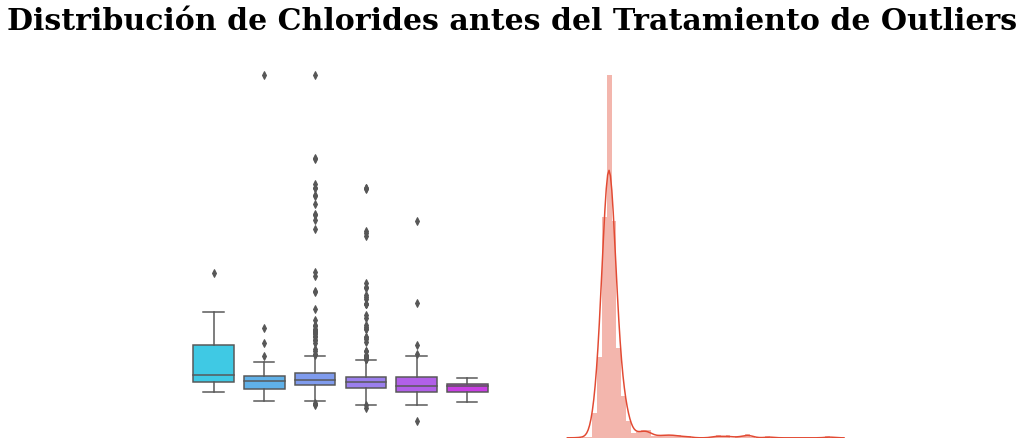

In [ ]:
plt.rcParams['font.family'] = ['serif']
background_color = "#ffffff"
fig = plt.figure(figsize=(12,7), facecolor=background_color)
fig.suptitle('Distribución de Chlorides antes del Tratamiento de Outliers', fontsize=30, fontweight='bold')

ax1 = fig.add_subplot(121)
ax1 = sns.boxplot(x=df1["quality"], y=df1["chlorides"],palette="cool")
plt.axis('off')

ax2 = fig.add_subplot(122)
x=df1["chlorides"]
ax2 = sns.distplot(x)
plt.axis('off')
plt.show();

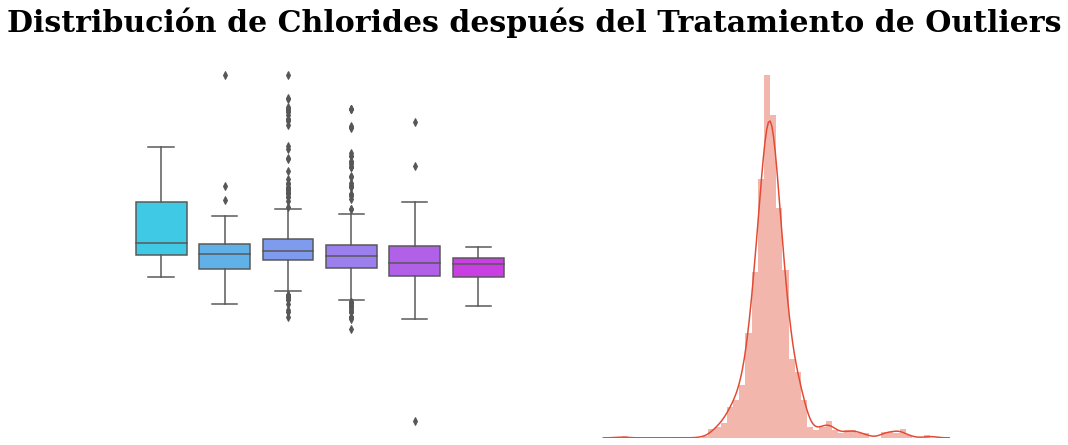

In [ ]:
df1["Log_chlorides"]=np.log(df1["chlorides"])

plt.rcParams['font.family'] = ['serif']
background_color = "#ffffff"
fig = plt.figure(figsize=(15,7), facecolor=background_color)
fig.suptitle('Distribución de Chlorides después del Tratamiento de Outliers', fontsize=30, fontweight='bold')

ax1 = fig.add_subplot(121)
ax1 = sns.boxplot(x=df1["quality"], y=df1["Log_chlorides"],palette="cool")
plt.axis('off')

ax2 = fig.add_subplot(122)
x=df1["Log_chlorides"]
ax2 = sns.distplot(x)
plt.axis('off')
plt.show();

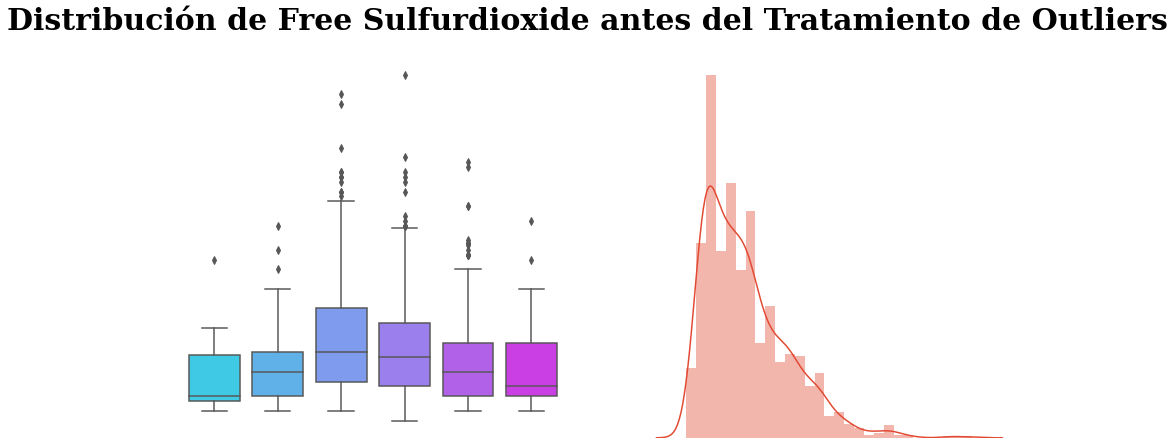

In [ ]:
plt.rcParams['font.family'] = ['serif']
background_color = "#ffffff"
fig = plt.figure(figsize=(15,7), facecolor=background_color)
fig.suptitle('Distribución de Free Sulfurdioxide antes del Tratamiento de Outliers', fontsize=30, fontweight='bold')

ax1 = fig.add_subplot(121)
ax1 = sns.boxplot(x=df1["quality"], y=df1["free.sulfur.dioxide"],palette="cool")
plt.axis('off')

ax2 = fig.add_subplot(122)
x=df1["free.sulfur.dioxide"]
ax2 = sns.distplot(x)
plt.axis('off')
plt.show();

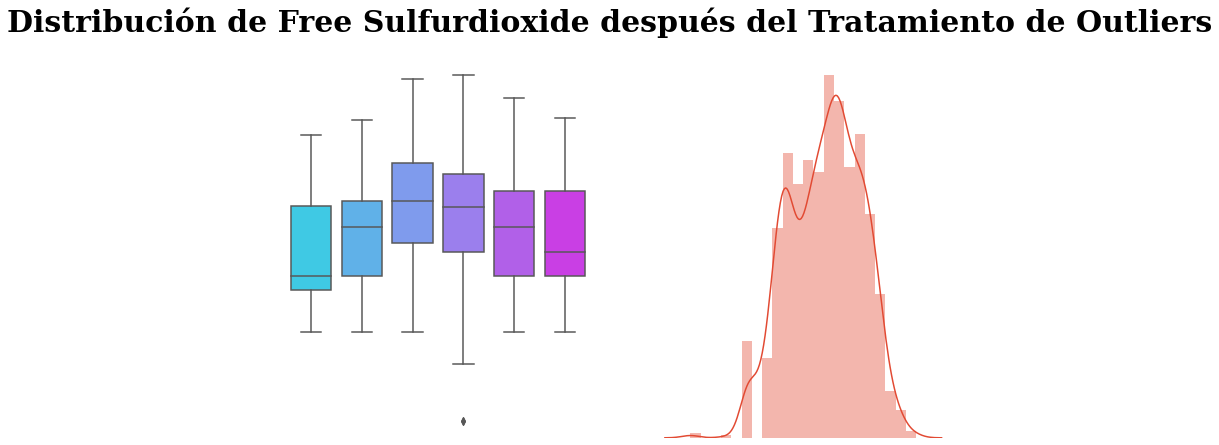

In [ ]:
df1["Log_free sulfur dioxide"]=np.log(df1["free.sulfur.dioxide"])

plt.rcParams['font.family'] = ['serif']
background_color = "#ffffff"
fig = plt.figure(figsize=(12,7), facecolor=background_color)
fig.suptitle('Distribución de Free Sulfurdioxide después del Tratamiento de Outliers', fontsize=30, fontweight='bold')

ax1 = fig.add_subplot(121)
ax1 = sns.boxplot(x=df1["quality"], y=df1["Log_free sulfur dioxide"],palette="cool")
plt.axis('off')

ax2 = fig.add_subplot(122)
x=df1["Log_free sulfur dioxide"]
ax2 = sns.distplot(x)
plt.axis('off')
plt.show();

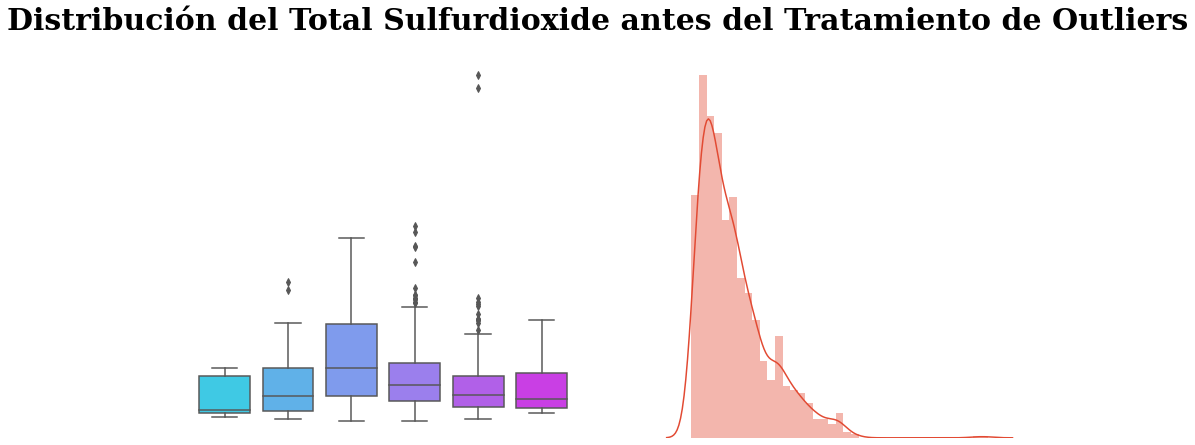

In [ ]:
plt.rcParams['font.family'] = ['serif']
background_color = "#ffffff"
fig = plt.figure(figsize=(15,7), facecolor=background_color)
fig.suptitle('Distribución del Total Sulfurdioxide antes del Tratamiento de Outliers', fontsize=30, fontweight='bold')


ax1 = fig.add_subplot(121)
ax1 = sns.boxplot(x=df1["quality"], y=df1["total.sulfur.dioxide"],palette="cool")
plt.axis('off')

ax2 = fig.add_subplot(122)
x=df1["total.sulfur.dioxide"]
ax2 = sns.distplot(x)
plt.axis('off')
plt.show();

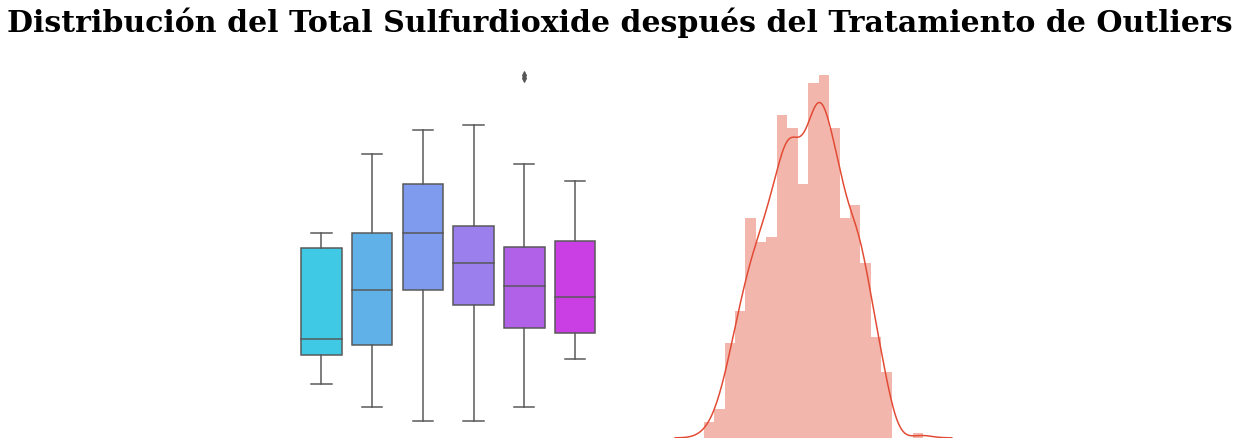

In [ ]:
df1["Log_total sulfur dioxide"]=np.log(df1["total.sulfur.dioxide"])

plt.rcParams['font.family'] = ['serif']
background_color = "#ffffff"
fig = plt.figure(figsize=(12,7), facecolor=background_color)
fig.suptitle('Distribución del Total Sulfurdioxide después del Tratamiento de Outliers', fontsize=30, fontweight='bold')

ax1 = fig.add_subplot(121)
ax1 = sns.boxplot(x=df1["quality"], y=df1["Log_total sulfur dioxide"],palette="cool")
plt.axis('off')

ax2 = fig.add_subplot(122)
x=df1["Log_total sulfur dioxide"]
ax2 = sns.distplot(x)
plt.axis('off')
plt.show();

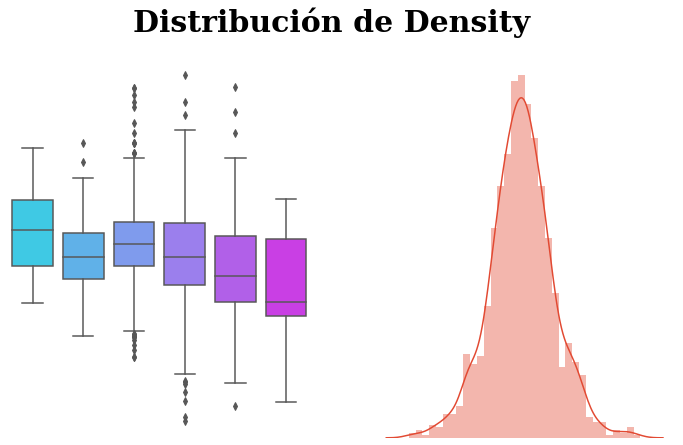

In [ ]:
plt.rcParams['font.family'] = ['serif']
background_color = "#ffffff"
fig = plt.figure(figsize=(12,7), facecolor=background_color)
fig.suptitle('Distribución de Density', fontsize=30, fontweight='bold')

ax1 = fig.add_subplot(121)
ax1 = sns.boxplot(x=df1["quality"], y=df1["density"],palette="cool")
plt.axis('off')

ax2 = fig.add_subplot(122)
x=df1["density"]
ax2 = sns.distplot(x)
plt.axis('off')
plt.show();

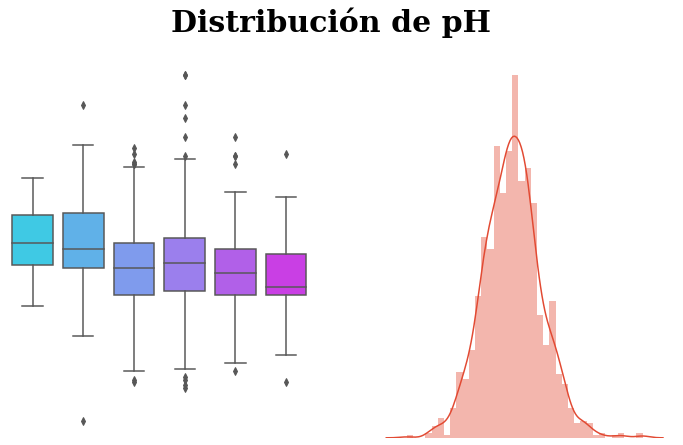

In [ ]:
plt.rcParams['font.family'] = ['serif']
background_color = "#ffffff"
fig = plt.figure(figsize=(12,7), facecolor=background_color)
fig.suptitle('Distribución de pH', fontsize=30, fontweight='bold')

ax1 = fig.add_subplot(121)
ax1 = sns.boxplot(x=df1["quality"], y=df1["pH"],palette="cool")
plt.axis('off')

ax2 = fig.add_subplot(122)
x=df1["pH"]
ax2 = sns.distplot(x)
plt.axis('off')
plt.show();

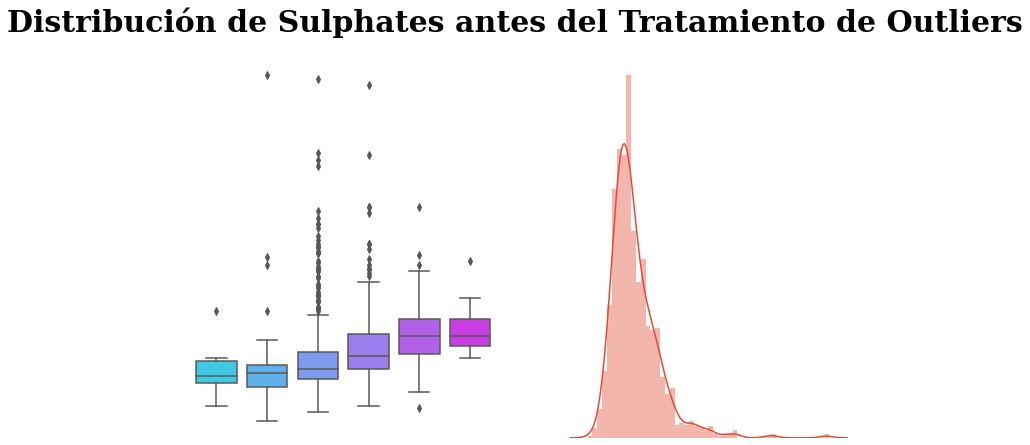

In [ ]:
plt.rcParams['font.family'] = ['serif']
background_color = "#ffffff"
fig = plt.figure(figsize=(12,7), facecolor=background_color)
fig.suptitle('Distribución de Sulphates antes del Tratamiento de Outliers', fontsize=30, fontweight='bold')

ax1 = fig.add_subplot(121)
ax1 = sns.boxplot(x=df1["quality"], y=df1["sulphates"],palette="cool")
plt.axis('off')

ax2 = fig.add_subplot(122)
x=df1["sulphates"]
ax2 = sns.distplot(x)
plt.axis('off')
plt.show();

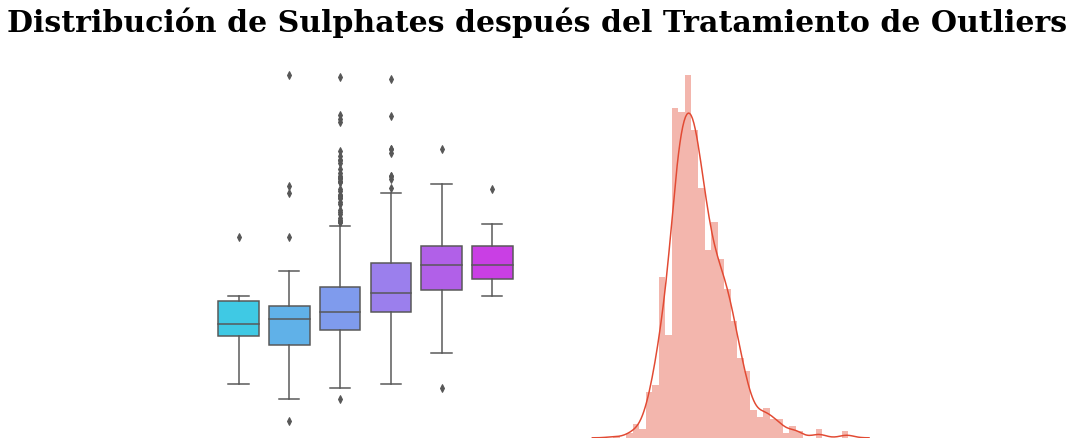

In [ ]:
df1["Log_sulphates"]=np.log(df1["sulphates"])

plt.rcParams['font.family'] = ['serif']
background_color = "#ffffff"
fig = plt.figure(figsize=(12,7), facecolor=background_color)
fig.suptitle('Distribución de Sulphates después del Tratamiento de Outliers', fontsize=30, fontweight='bold')

ax1 = fig.add_subplot(121)
ax1 = sns.boxplot(x=df1["quality"], y=df1["Log_sulphates"],palette="cool")
plt.axis('off')

ax2 = fig.add_subplot(122)
x=df1["Log_sulphates"]
ax2 = sns.distplot(x)
plt.axis('off')
plt.show();

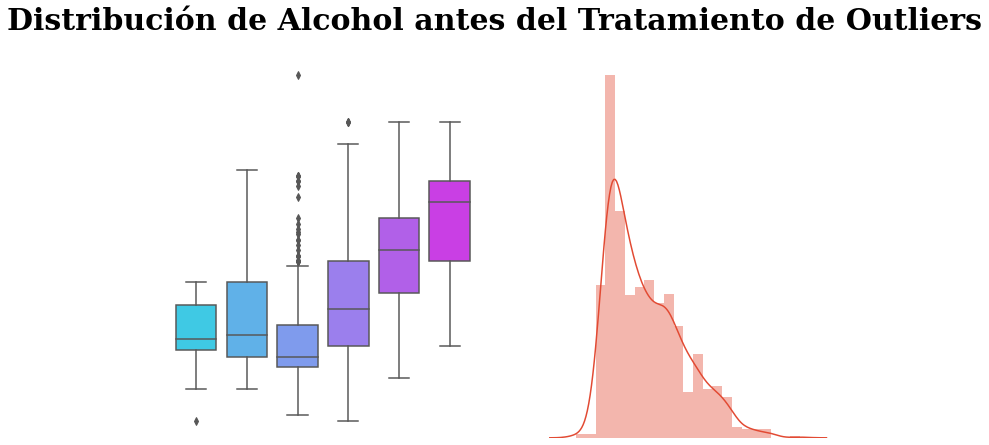

In [ ]:
plt.rcParams['font.family'] = ['serif']
background_color = "#ffffff"
fig = plt.figure(figsize=(12,7), facecolor=background_color)
fig.suptitle('Distribución de Alcohol antes del Tratamiento de Outliers', fontsize=30, fontweight='bold')

ax1 = fig.add_subplot(121)
ax1 = sns.boxplot(x=df1["quality"], y=df1["alcohol"],palette="cool")
plt.axis('off')

ax2 = fig.add_subplot(122)
x=df1["alcohol"]
ax2 = sns.distplot(x)
plt.axis('off')
plt.show();

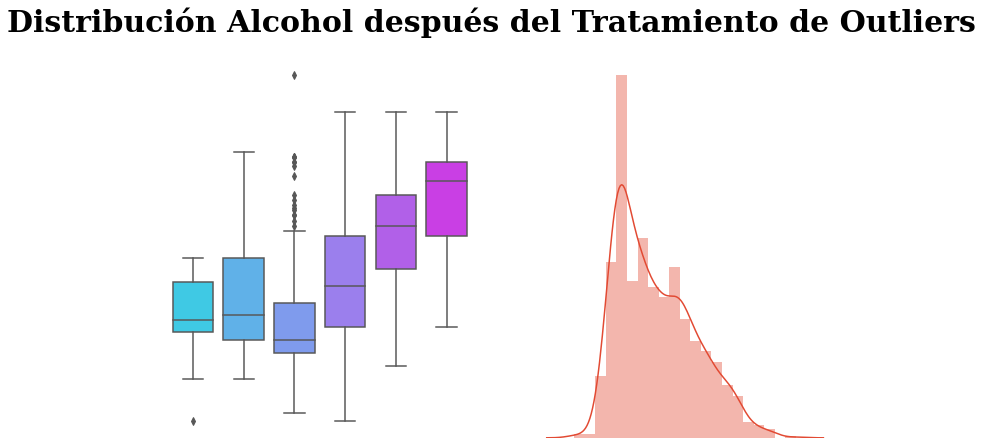

In [ ]:
df1["Log_alcohol"]=np.log(df1["alcohol"])
plt.rcParams['font.family'] = ['serif']
background_color = "#ffffff"
fig = plt.figure(figsize=(12,7), facecolor=background_color)
fig.suptitle('Distribución Alcohol después del Tratamiento de Outliers', fontsize=30, fontweight='bold')

ax1 = fig.add_subplot(121)
ax1 = sns.boxplot(x=df1["quality"], y=df1["Log_alcohol"],palette="cool")
plt.axis('off')

ax2 = fig.add_subplot(122)
x=df1["Log_alcohol"]
ax2 = sns.distplot(x)
plt.axis('off')
plt.show();

<p style="border-style:outset;font-family:Georgia;color:#03051a;font-size:110%;text-align:left;">En los gráficos anteriores, hemos detectado el valor atípico utilizando diagramas de caja y gráficos de distribución. Hemos usado transformación logaritmica para los registros para manejar los valores atípicos.</p>

<a id="9"></a>
<h2 style="border-style: outset;color:black;font-size:25px;font-family:Georgia;text-align:left;"><b>9.Feature Engineering & Feature Transformación</b></h2>

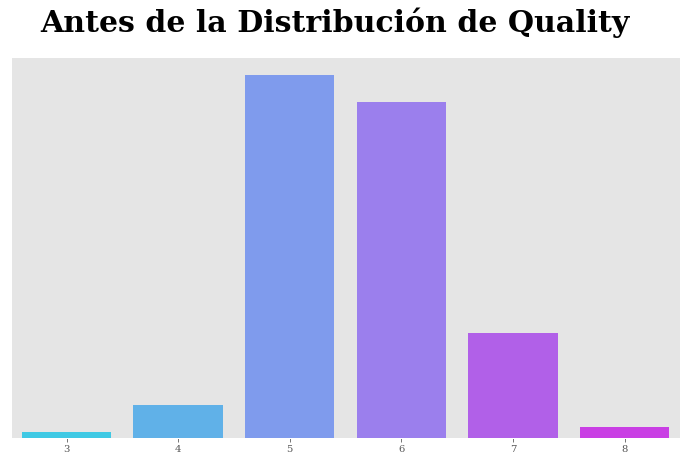

In [ ]:
plt.rcParams['font.family'] = ['serif']
background_color = "#ffffff"
fig = plt.figure(figsize=(12,7), facecolor=background_color)
fig.suptitle('Antes de la Distribución de Quality', fontsize=30, fontweight='bold')
ax = sns.barplot(y = df1['quality'].value_counts().values.tolist(), 
                      x = df1['quality'].value_counts().index, palette="cool")
ax.get_yaxis().set_visible(False)
plt.show();

<p style="border-style:outset;font-family:Georgia;color:#03051a;font-size:110%;text-align:left;">Transformación de características solo para convertir el conjunto de datos de destino en una clasificación binaria.</p>


In [ ]:
df1["quality"].unique()

array([5, 6, 7, 4, 8, 3])

In [ ]:
# Feature Engineering...
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
df1['quality'] = pd.cut(df1['quality'], bins = bins, labels = group_names)
df1.head(10)

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,bad
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,bad
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,bad
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,good
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,good
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,bad
10,6.7,0.58,0.08,1.8,0.097,15.0,65.0,0.9959,3.28,0.54,9.2,bad


In [ ]:
# Feature Transformation...
df1['quality'].replace({'bad':0, 'good':1}, inplace=True)

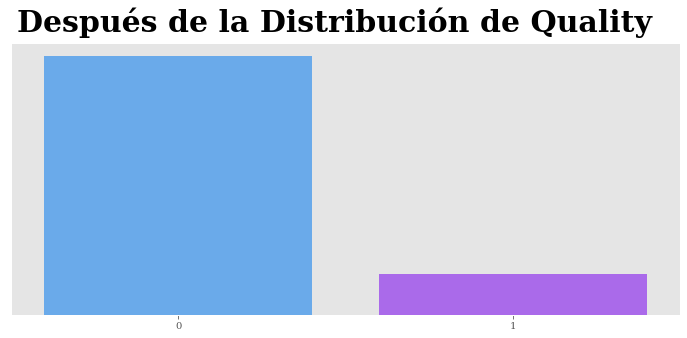

In [ ]:
plt.rcParams['font.family'] = ['serif']
background_color = "#ffffff"
fig = plt.figure(figsize=(12,5), facecolor=background_color)
fig.suptitle('Después de la Distribución de Quality', fontsize=30, fontweight='bold')

ax = sns.barplot(y = df1['quality'].value_counts().values.tolist(), 
                      x = df1['quality'].value_counts().index, palette="cool")
ax.get_yaxis().set_visible(False)
plt.show();

<a id="11"></a>
<h2 style="border-style: outset;color:black;font-size:25px;font-family:Georgia;text-align:left;"><b>10.Comprobación de la relación entre los Features</b></h2>

<Figure size 1080x504 with 0 Axes>

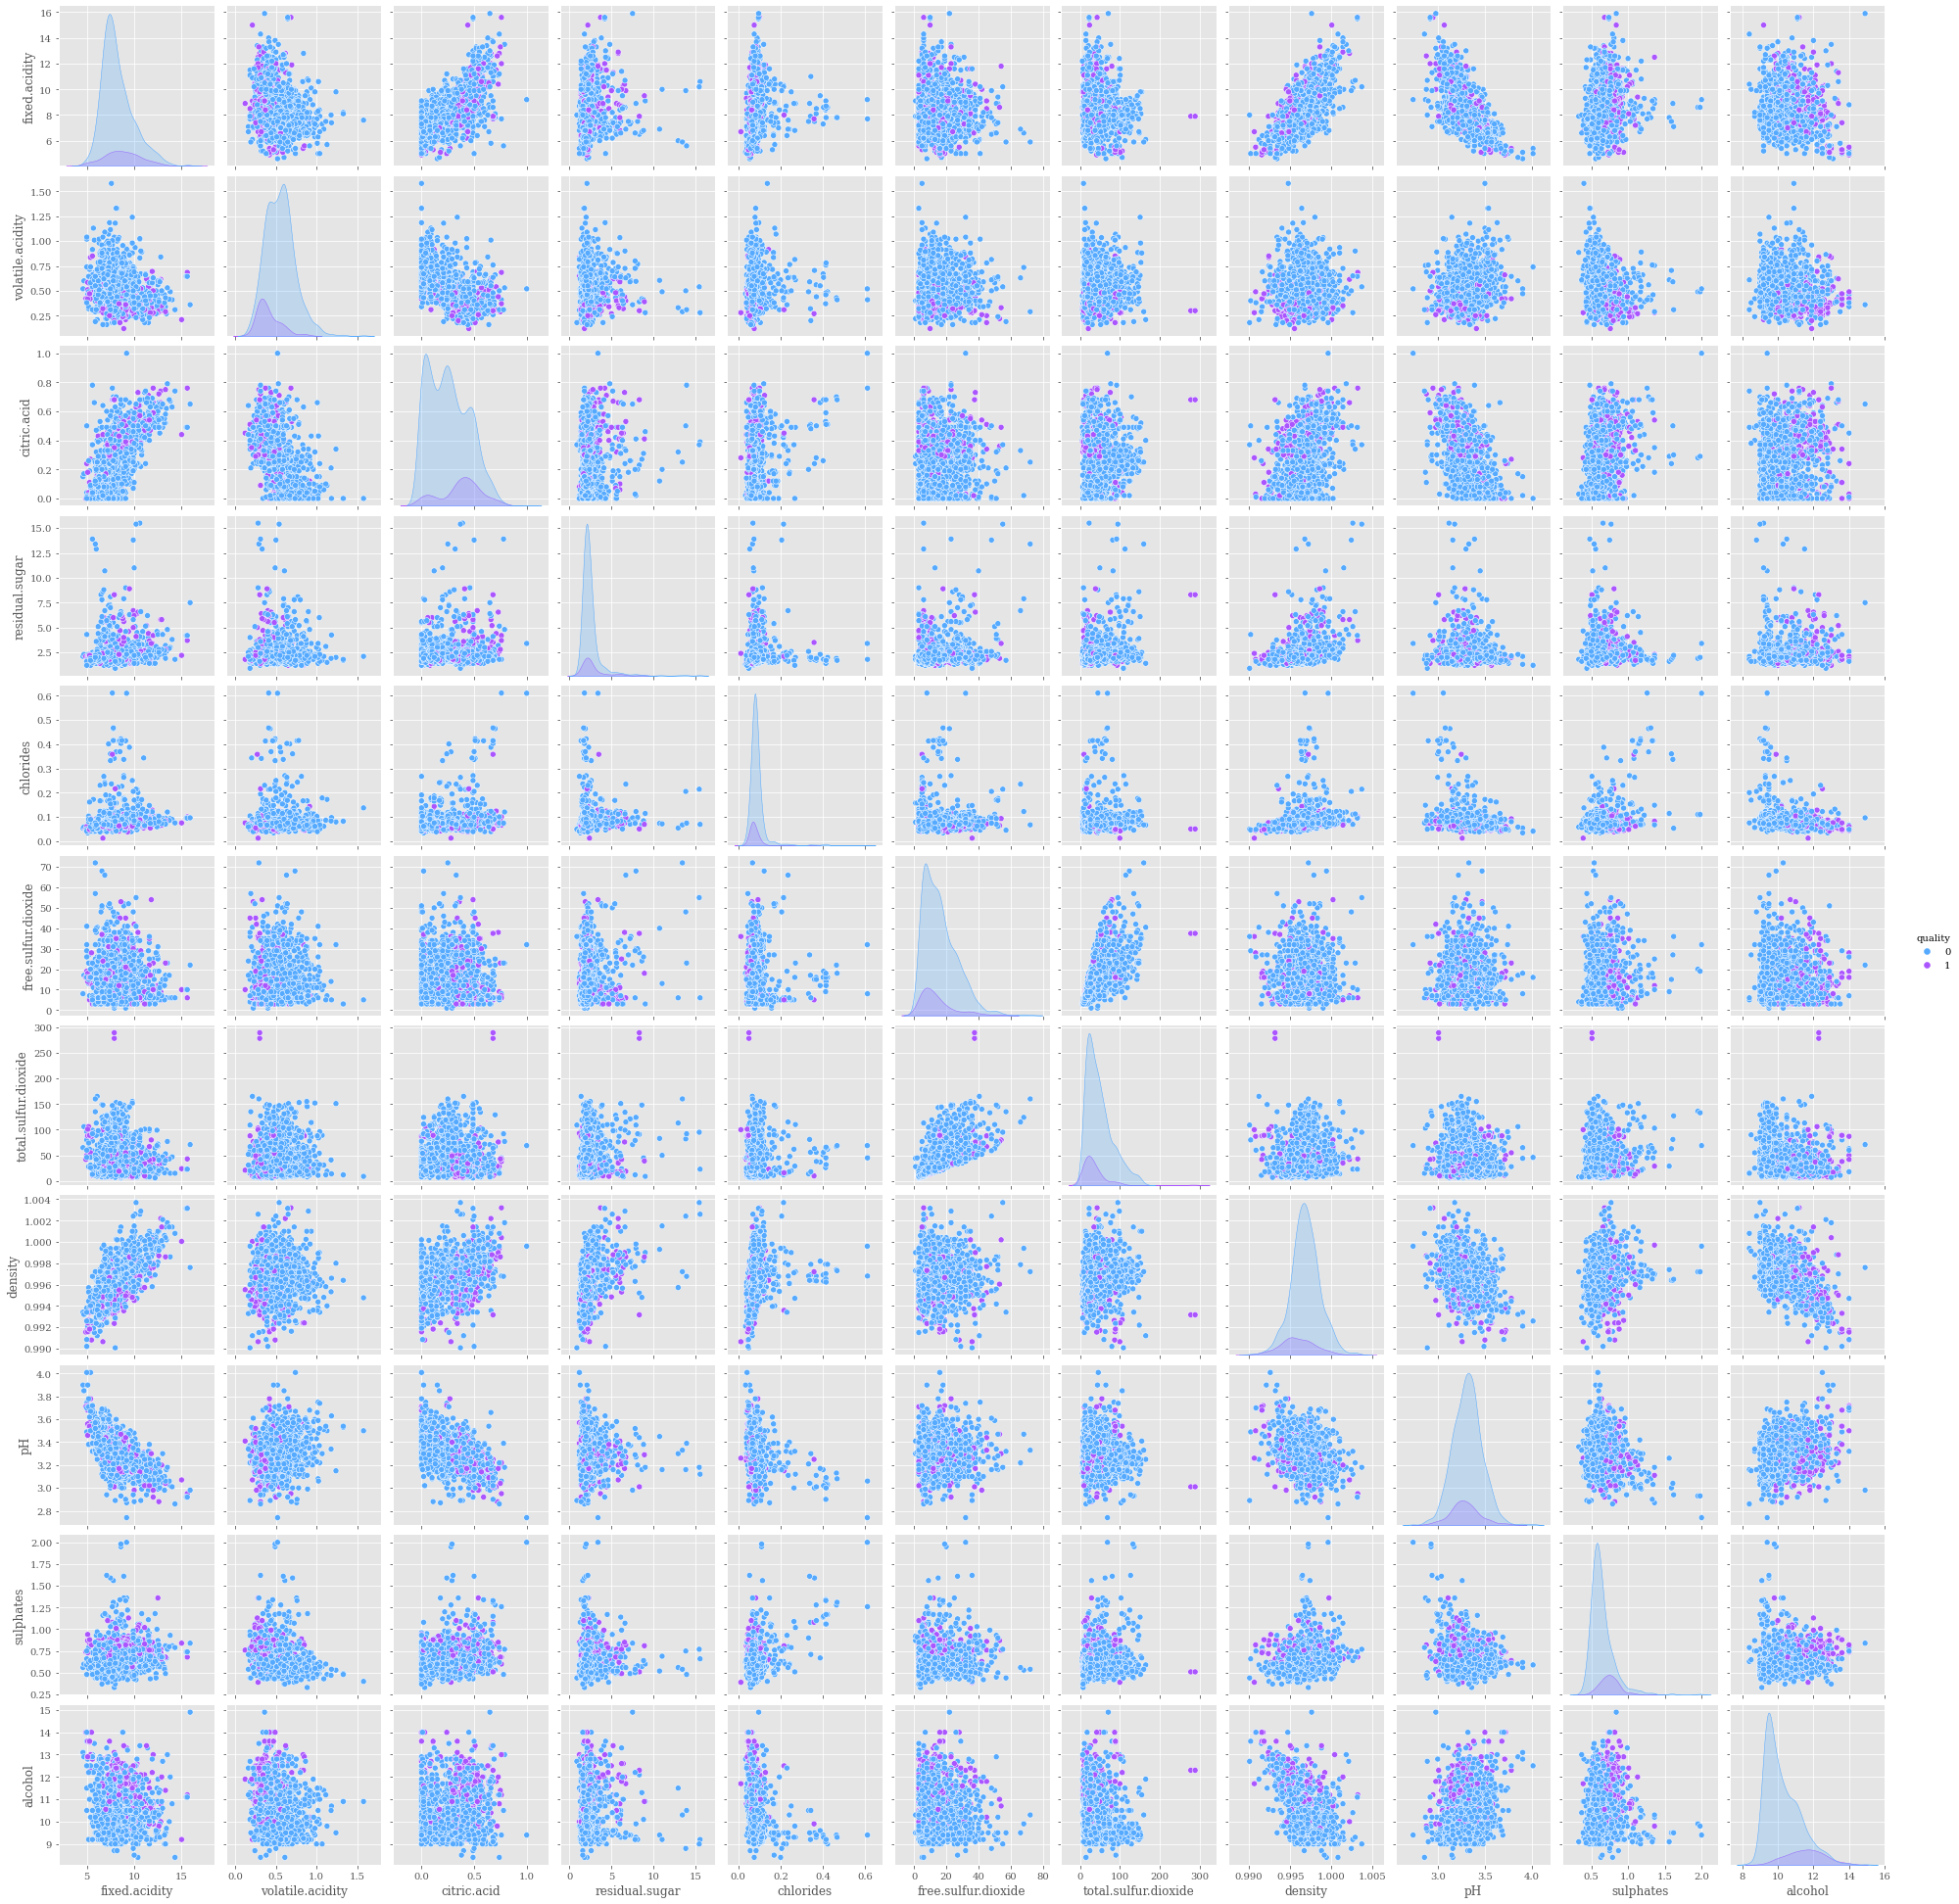

In [ ]:
background_color = "#ffffff"
fig = plt.figure(figsize=(15,7), facecolor=background_color)
sns.pairplot(df1,hue='quality',palette="cool");

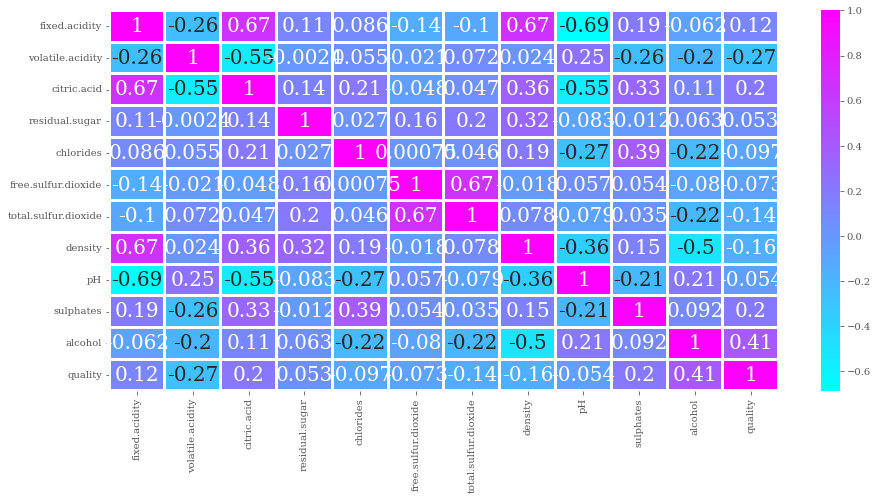

In [ ]:
background_color = "#ffffff"
fig = plt.figure(figsize=(15,7), facecolor=background_color)
sns.heatmap(df1.corr(), annot=True,cmap = "cool",linewidths=2,linecolor = "white",cbar=True,annot_kws={"size":20});

<a id="12"></a>
<h2 style="border-style: outset;color:black;font-size:25px;font-family:Georgia;text-align:left;"><b>11.Reducción de Dimensión usando PCA</b></h2>

<p style="border-style:outset;font-family:Georgia;color:#03051a;font-size:110%;text-align:left;"> El análisis de componentes principales, o PCA, es un método de reducción de la dimensionalidad que se usa a menudo para reducir la dimensionalidad de grandes conjuntos de datos, mediante la transformación de un gran conjunto de variables en uno más pequeño que todavía contiene la mayor parte de la información del gran conjunto.<br> Reducir el número de variables de un conjunto de datos naturalmente se logra a expensas de la precisión, pero el truco en la reducción de la dimensionalidad es cambiar un poco de precisión por simplicidad. Porque los conjuntos de datos más pequeños son más fáciles de explorar y visualizar y hacen que el análisis de datos sea mucho más fácil y rápido para los algoritmos de Machine Learning sin variables extrañas para procesar.<br>
<b>¿Cómo funciona?</b><br>
Supóngase que existe una muestra con  $n$  individuos cada uno con  $p$  variables $( X_1 ,  X_2 ,\cdots,  X_p )$, es decir, el espacio muestral tiene $p$  dimensiones. PCA permite encontrar un número de factores subyacentes  $(z<p)$  que explican aproximadamente lo mismo que las  $p$  variables originales. Donde antes se necesitaban  p  valores para caracterizar a cada individuo, ahora bastan  $z$  valores. Cada una de estas  $z$  nuevas variables recibe el nombre de componente principal.



<h2 style="border-style: outset;color:black;font-size:25px;font-family:Georgia;text-align:left;"><b>11.2 Cálculo de las componentes principales </b></h2>

<p style="border-style:outset;font-family:Georgia;color:#03051a;font-size:110%;text-align:left;">Cada componente principal $(Z_i)$ se obtiene por combinación lineal de las variables originales. Se pueden entender como nuevas variables obtenidas al combinar de una determinada forma las variables originales. La primera componente principal de un grupo de variables $(X_1,  X_2 , \cdots, X_p)$ es la combinación lineal normalizada de dichas variables que tiene mayor varianza:
<b>
$$Z_1=\phi_{11} X_1 + \phi_{21}X_2+ \cdots + \phi_{p1}X_p$$
<b>
Que la combinación lineal sea normalizada implica que:
$$\displaystyle\sum_{j=1}^p \phi^{2}_{j1}= 1$$
<b>
Los términos  $\phi_{11} , \cdots,\phi_{1p}$  reciben en el nombre de loadings y son los que definen las componentes. Por ejemplo, $\phi_{11}$  es el loading de la variable  $X_1$  de la primera componente principal. Los loadings pueden interpretarse como el peso/importancia que tiene cada variable en cada componente y, por lo tanto, ayudan a conocer que tipo de información recoge cada una de las componentes.

<p style="border-style:outset;font-family:Georgia;color:#03051a;font-size:110%;text-align:left;">Dado un set de datos $X$ con $n$ observaciones y $p$ variables, el proceso a seguir para calcular la primera componente principal es:
<br>
Centrar las variables: se resta a cada valor la media de la variable a la que pertenece. Con esto se consigue que todas las variables tengan media cero.
<br>
Se resuelve un problema de optimización para encontrar el valor de los loadings con los que se maximiza la varianza. Una forma de resolver esta optimización es mediante el cálculo de eigenvector-eigenvalue de la matriz de covarianzas.
<br>
Una vez calculada la primera componente $(Z_1)$, se calcula la segunda $(Z_2)$ repitiendo el mismo proceso pero añadiendo la condición de que la combinación lineal no pude estar correlacionada con la primera componente. Esto equivale a decir que  $Z_1$  y  $Z_2$  tienen que ser perpendiculares. EL proceso se repite de forma iterativa hasta calcular todas las posibles componentes $(min(n-1, p))$ o hasta que se decida detener el proceso. El orden de importancia de las componentes viene dado por la magnitud del eigenvalue asociado a cada eigenvector.

<a id="13"></a>
<h2 style="border-style: outset;color:black;font-size:25px;font-family:Georgia;text-align:left;"><b>13.Implementación PCA </b></h2>

<p style="border-style:outset;font-family:Georgia;color:#03051a;font-size:110%;text-align:left;">La clase `sklearn.decomposition.PCA` incorpora las principales funcionalidades que se necesitan a la hora de trabajar con modelos PCA. El argumento `n_components` determina el número de componentes calculados. Si se indica `None`, se calculan todas las posibles $(min(filas, columnas)$ - 1).
<br>
Por defecto, `PCA()` centra los valores pero no los escala. Esto es importante ya que, si las variables tienen distinta dispersión, como en este caso, es necesario escalarlas.

In [ ]:
# Feature Variables
X = df1.drop('quality',axis=1)

#Target Variable
Y = df1['quality']

In [ ]:
# Partición de los Datos
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,random_state=353)

print("Entrenamineto", x_train.shape)
print("Prueba x_test", x_test.shape)
print("Entrenamiento y_train",y_train.shape)
print("Prueba y_test",y_test.shape)

Entrenamineto (1087, 11)
Prueba x_test (272, 11)
Entrenamiento y_train (1087,)
Prueba y_test (272,)


In [ ]:
# performing preprocessing part
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x_train_sc = sc.fit_transform(x_train)
x_test_sc = sc.transform(x_test)

In [ ]:
x_train_sc=pd.DataFrame(x_train_sc, columns=x_train.columns)
x_test_sc=pd.DataFrame(x_test_sc, columns=x_test.columns)

In [ ]:
x_train_sc.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol
0,0.400030,-0.486038,1.121159,-0.078988,-0.211886,0.942477,2.152102,0.594216,-0.511966,-0.457541,-1.124761
1,0.457853,1.306249,-0.259949,-0.230617,-0.190783,-0.378936,0.019352,0.486150,-0.833238,-0.881950,-0.756184
2,-0.178205,-0.272034,0.353877,-0.230617,-0.317401,-0.001389,-0.652611,-1.675178,-0.190694,0.027498,1.823853
3,-0.178205,0.476982,0.405029,0.224270,-0.043061,1.131250,0.136215,0.161950,0.002069,-0.215021,0.349546
4,-0.640792,0.423481,-0.976079,1.134043,-0.127473,0.942477,1.772297,-0.156845,-0.383457,-0.881950,-0.940473


In [ ]:
# Aplicando PCA PARA REDUCCIÓN DE DIMENSIONALIDAD......
# Llamar al modelo n_componets=None
pca = PCA(n_components = None)

x_train = pca.fit_transform(x_train_sc)
x_test = pca.transform(x_test_sc)

Una vez calculadas las componentes principales, se puede conocer la varianza explicada por cada una de ellas, la proporción respecto al total y la proporción de varianza acumulada. Esta información está almacenada en los atributos `explained_variance_` y `explained_variance_ratio_` del modelo.

In [ ]:
pca.explained_variance_

array([3.08167023, 1.90160773, 1.59466296, 1.22464697, 0.98270466,
       0.64793383, 0.58380658, 0.40984461, 0.3436152 , 0.17930668,
       0.06032947])

In [ ]:
pca.explained_variance_ratio_

array([0.27989411, 0.17271439, 0.14483599, 0.11122912, 0.0892546 ,
       0.05884889, 0.0530245 , 0.03722432, 0.03120901, 0.01628561,
       0.00547945])

----------------------------------------------------
Porcentaje de varianza explicada por cada componente
----------------------------------------------------
[0.27989411 0.17271439 0.14483599 0.11122912 0.0892546  0.05884889
 0.0530245  0.03722432 0.03120901 0.01628561 0.00547945]


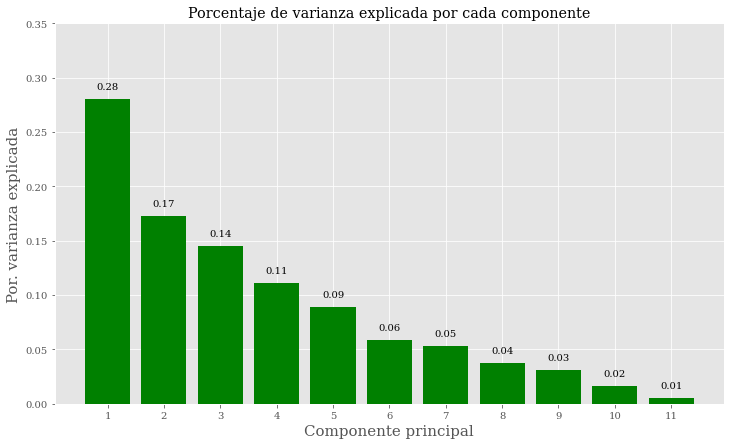

In [ ]:
# Porcentaje de varianza explicada por cada componente
# ==============================================================================
print('----------------------------------------------------')
print('Porcentaje de varianza explicada por cada componente')
print('----------------------------------------------------')
print(pca.explained_variance_ratio_)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 7))

ax.bar(x  = np.arange(pca.n_components_) + 1,color="green", 
    height = pca.explained_variance_ratio_,)

for x, y in zip(np.arange(len(X.columns)) + 1, pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center')
ax.set_xticks(np.arange(pca.n_components_) + 1)
ax.set_ylim(0, 0.35)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal', size=15)
ax.set_ylabel('Por. varianza explicada', size=15);
fig.show()

En este caso, la primera componente explica el 24% de la varianza observada en los datos y la segunda el 15%, la tercera el 12%, la cuarta 8% y la quinta 7%. Estas cinco últimas componentes no superan por separado el 100% de varianza explicada.

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.27989411 0.4526085  0.5974445  0.70867362 0.79792822 0.8567771
 0.9098016  0.94702593 0.97823494 0.99452055 1.        ]


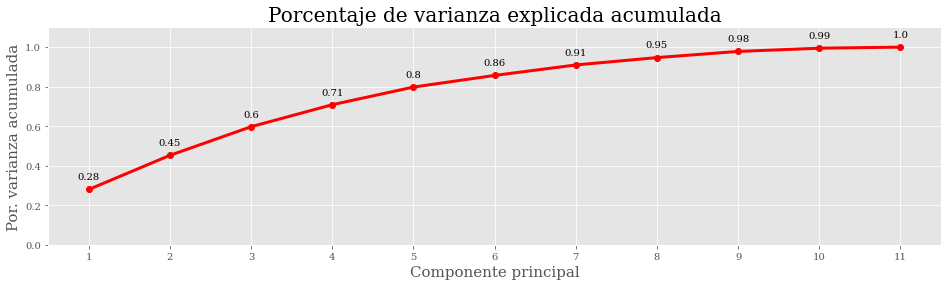

In [ ]:
# Porcentaje de varianza explicada acumulada
# ==============================================================================
prop_varianza_acum = pca.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 4))
ax.plot(np.arange(len(X.columns)) + 1, 
    prop_varianza_acum, marker = 'o', lw=3, color="red")

for x, y in zip(np.arange(len(X.columns)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,(x,y),
        textcoords="offset points",
        xytext=(0,10),ha='center')
    
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada', size=20)
ax.set_xlabel('Componente principal', size=15)
ax.set_ylabel('Por. varianza acumulada', size=15);   

<p style= "border-style:outset;font-family:Georgia;color:#03051a;font-size:110%;text-align:left;"><b> Estoy seleccionando las 5 características principales, puede elegir su propio número principal de funciones.</b></p>

In [ ]:
pca = PCA(n_components = 5)
x_train = pca.fit_transform(x_train_sc)
x_test = pca.transform(x_test_sc)

explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[0.27989411 0.17271439 0.14483599 0.11122912 0.0892546 ]


El total de la varianza explicada para nuestro modelo con 5 componentes principales es:

In [ ]:
pca.explained_variance_ratio_.sum()

0.7979282174720427

<a id="14"></a>
<h2 style="border-style: outset;color:black;font-size:25px;font-family:Georgia;text-align:left;"><b>14.Creación de modelos</b></h2>

,CrossVal_Score_Means,CrossValerrors,Modelo
1,0.873952,0.012032,AdaBoostClassifier
2,0.873039,0.029608,Gradient Boosting
0,0.870275,0.014305,RandomForestClassifier
3,0.829807,0.031930,DecisionTreeClassifier


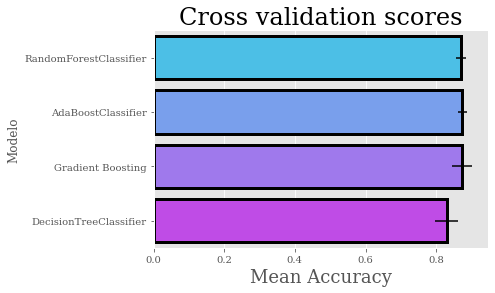

<Figure size 1080x504 with 0 Axes>

In [ ]:
# =============================================================================
# Cross validation en un conjunto diferente de algoritmo
# =============================================================================

kfold = StratifiedKFold(n_splits=8,shuffle=True, random_state=42)


rs = 123
clrs = []

clrs.append(AdaBoostClassifier(random_state=rs))
clrs.append(GradientBoostingClassifier(random_state=rs))
clrs.append(RandomForestClassifier(random_state=rs))
clrs.append(DecisionTreeClassifier(random_state = rs))

cv_results = []
for clr in clrs :
    cv_results.append(cross_val_score(clr, x_train, y_train , scoring = 'accuracy', cv = kfold, n_jobs=-1))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())
    
cv_df = pd.DataFrame({"CrossVal_Score_Means":cv_means,"CrossValerrors": cv_std,"Modelo":["RandomForestClassifier","AdaBoostClassifier","Gradient Boosting",'DecisionTreeClassifier']})
g = sns.barplot("CrossVal_Score_Means","Modelo",data = cv_df,orient = "h",**{'xerr':cv_std},palette='cool',edgecolor="black",linewidth=3)
g.set_xlabel("Mean Accuracy",fontsize = 18)
g = g.set_title("Cross validation scores",fontsize = 24)
plt.figure(figsize = (15,7))


cv_df.sort_values("CrossVal_Score_Means", ascending=False)

<p style="border-style:outset;font-family:Georgia;color:#03051a;font-size:110%;text-align:left;"><b>Ada boosting es el Ganador.</b></p>

<a id="15"></a>
<h2 style="border-style:outset;color:black;font-size:25px;font-family:Georgia;text-align:left;"><b>15.Hyper Parameter Tunning</b></h2>

In [ ]:
ada = AdaBoostClassifier(base_estimator = dtc)

parameters = {
    'n_estimators' : [50, 70, 90, 120, 180, 200],
    'learning_rate' : [0.001, 0.01, 0.1, 1, 10],
    'algorithm' : ['SAMME', 'SAMME.R']
}

grid_search = GridSearchCV(ada, parameters, n_jobs = -1, cv = 10, verbose = 1)
grid_search.fit(x_train, y_train)

Fitting 10 folds for each of 60 candidates, totalling 600 fits


GridSearchCV(cv=10,
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                                                max_depth=5,
                                                                                min_samples_leaf=6,
                                                                                min_samples_split=3)),
             n_jobs=-1,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.001, 0.01, 0.1, 1, 10],
                         'n_estimators': [50, 70, 90, 120, 180, 200]},
             verbose=1)

In [ ]:
print(grid_search.best_params_)
print("==="*30)
print(grid_search.best_score_)

{'algorithm': 'SAMME.R', 'learning_rate': 1, 'n_estimators': 120}
0.8721542643560992


<a id="15"></a>
<h2 style="border-style: outset;color:black;font-size:25px;font-family:Georgia;text-align:left;"><b>16.Final Model</b></h2>

In [ ]:
ada = AdaBoostClassifier(base_estimator = dtc, algorithm= "SAMME", learning_rate= 1, n_estimators= 120)
ada.fit(x_train, y_train)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                         max_depth=5,
                                                         min_samples_leaf=6,
                                                         min_samples_split=3),
                   learning_rate=1, n_estimators=120)

In [ ]:
print(confusion_matrix(y_test, Y_pred))

[[214  24]
 [ 16  18]]


In [ ]:
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.93      0.90      0.91       238
           1       0.43      0.53      0.47        34

    accuracy                           0.85       272
   macro avg       0.68      0.71      0.69       272
weighted avg       0.87      0.85      0.86       272



In [ ]:
print(accuracy_score(y_test, Y_pred))

0.8529411764705882


<a id="17"></a>
<h2 style="border-style:outset;color:black;font-size:25px;font-family:Georgia;text-align:left;"><b>17.Conclusion</b></h2>
<p style="border-style:outset;font-family:Georgia;color:#03051a;font-size:110%;text-align:left;"> Dado que el conjunto de datos es un conjunto de datos desequilibrado, intenté usar solo algoritmos basados en árboles como Ada boost, Árbol de decisión, Árbol forestal aleatorio, etc.<br>
Las ventajas de cualquier algoritmo basado en árboles son: está especializado en trabajar con el conjunto de datos desequilibrado.<br>
Para esta predicción, la clasificación de refuerzo de ADA está dando una precisión muy buena, es decir, <b>87%</b>
Mientras tanto, puede usar su modelo de clasificación favorito y obtener una buena precisión.<br>


#DATA & ANALYTICS





Web: www.datayanalytics.com